In [1]:
# Load the "autoreload" extension so that code can change
%load_ext autoreload

# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [4]:
import tensorflow as tf

In [13]:
from src.models import seq2seq, data_pre_processing
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from src.data.word_utils import Vocab
# Used to get the graph
from tensorflow.python.keras import backend as K

In [14]:
dataset = data_pre_processing.process_data('../data/processed/msg_tokens.npz', batch_size=32, buffer_size=10000)

In [16]:
vocab = Vocab('../data/processed/vocab_pp.json')

In [27]:
model_params = {
    'encoder_depth': 1,
    'encoder_units': 1, 
    'decoder_depth': 1,
    'embedding_dim': 10,
    'vocab_size': len(vocab),
}
model, encoder_model, decoder_model  = seq2seq.build_model(**model_params)
model = seq2seq.compile_model(model)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_input (InputLayer)      [(None, None)]       0                                            
__________________________________________________________________________________________________
encoder_input (InputLayer)      [(None, None)]       0                                            
__________________________________________________________________________________________________
encoder_embedding (Embedding)   (None, None, 10)     232710      encoder_input[0][0]              
                                                                 decoder_input[0][0]              
__________________________________________________________________________________________________
encoder_lstm-1 (LSTM)           [(None, 1), (None, 1 48          encoder_embedding[0][0]    

### Visualize with plot model

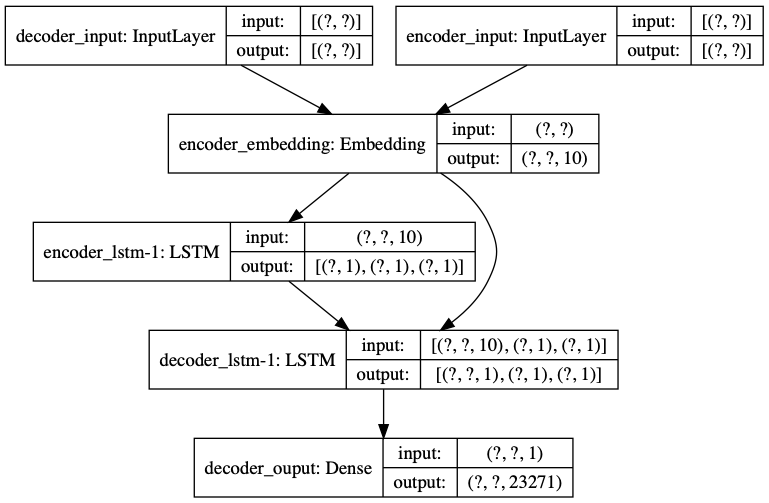

In [29]:
plot_model(model, show_shapes=True, to_file='full_model.png')

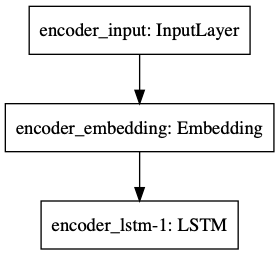

In [30]:
plot_model(encoder_model, to_file='enocder_model.png')

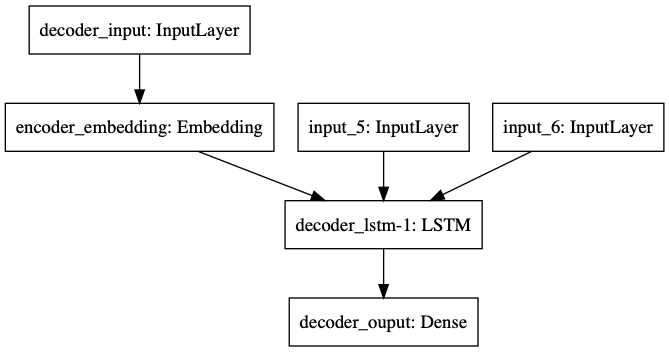

In [31]:
plot_model(decoder_model, to_file = 'decoder_model.png')

### Visualize with tensorboard

In [32]:
logdir = '../models/logs/exp00'
!rm -r $logdir

rm: ../models/logs/exp00: No such file or directory


In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
callbacks = [tensorboard_callback]
model.fit(dataset, steps_per_epoch=1, epochs=1, callbacks=callbacks)

Train for 1 steps
1/1 [==============================] - 20s 20s/step - loss: 0.6552


## %load_ext tensorboard

In [13]:
%tensorboard --logdir $logdir

Reusing TensorBoard on port 6006 (pid 4382), started 11:44:22 ago. (Use '!kill 4382' to kill it.)